<a href="https://colab.research.google.com/github/nescoba/DIP/blob/main/vanillaSLSDy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 'Vanilla' Sparse Learning of Stochastic Dynamical equations

## Loading the data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 
sns.set()

In [2]:
dfg = pd.read_csv('10G.csv', header=None)
dfr = pd.read_csv('10R.csv', header=None)

## EDA

Plotting a pair of series 

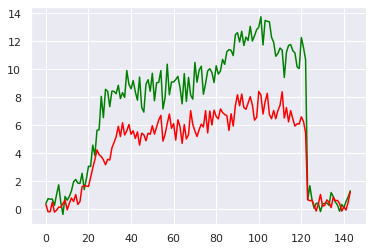

In [3]:
tsg = dfg[10]
tsr = dfr[10]

plt.plot(tsg, color='green')
plt.plot(tsr, color='red')

Once again, we get rid of the 'bursting' by restricting to the first 120 entries of the series:

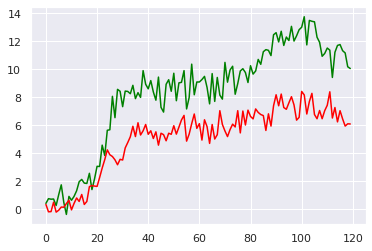

In [4]:
tsg = tsg[:120]
tsr = tsr[:120]

plt.plot(tsg, color='green')
plt.plot(tsr, color='red')

We 'differentiate' both series:

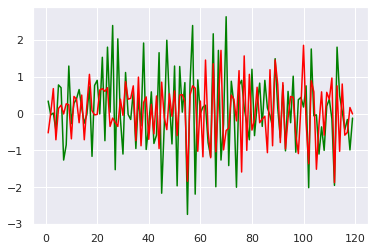

In [5]:
tsg0 = tsg[1:]
tsr0 = tsr[1:]

tsg1 = tsg.diff()[1:]
tsr1 = tsr.diff()[1:]

plt.plot(tsg1, color='green')
plt.plot(tsr1, color='red')

## Modeling 

We create the X matrix using polynomial features of degree 5

In [6]:
from sklearn.preprocessing import PolynomialFeatures
X = pd.concat([tsg0, tsr0], axis=1)
poly = PolynomialFeatures(5)
X = poly.fit_transform(X)

We now fit simple linear regression to the data, according to equations (15) and (17)

In [7]:
import statsmodels.api as sm
modelgsimple = sm.OLS(tsg1, X)
modelrsimple = sm.OLS(tsr1, X)

resultgsimple = modelgsimple.fit()
resultrsimple = modelrsimple.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
print(resultgsimple.summary())

                            OLS Regression Results                            
Dep. Variable:                     10   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.368
Date:                Tue, 01 Mar 2022   Prob (F-statistic):              0.157
Time:                        22:32:06   Log-Likelihood:                -162.68
No. Observations:                 119   AIC:                             367.4
Df Residuals:                      98   BIC:                             425.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5726      0.736     -0.778      0.4

In [9]:
print(resultrsimple.summary())

                            OLS Regression Results                            
Dep. Variable:                     10   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     2.154
Date:                Tue, 01 Mar 2022   Prob (F-statistic):            0.00699
Time:                        22:32:08   Log-Likelihood:                -116.05
No. Observations:                 119   AIC:                             274.1
Df Residuals:                      98   BIC:                             332.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2085      0.497      0.419      0.6

This is a similar procedure to the one last week, and like last week the fit is not great. But at least the F-statistic on the second one is very small.

Now we try to fit simple linear regression to the data, according to Equations (16) and (18)

In [ ]:
modelggsimple = sm.OLS(tsg1*tsg1, X)
modelgrsimple = sm.OLS(tsg1*tsr1, X)
modelrrsimple = sm.OLS(tsr1*tsr1, X)


resultggsimple = modelggsimple.fit()
resultgrsimple = modelgrsimple.fit()
resultrrsimple = modelrrsimple.fit()

In [ ]:
print(resultggsimple.summary())

                            OLS Regression Results                            
Dep. Variable:                     10   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.035
Date:                Tue, 01 Mar 2022   Prob (F-statistic):              0.430
Time:                        19:23:41   Log-Likelihood:                -213.56
No. Observations:                 119   AIC:                             469.1
Df Residuals:                      98   BIC:                             527.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4122      1.129      1.251      0.2

In [ ]:
print(resultgrsimple.summary())

                            OLS Regression Results                            
Dep. Variable:                     10   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1.537
Date:                Tue, 01 Mar 2022   Prob (F-statistic):             0.0859
Time:                        19:24:14   Log-Likelihood:                -142.55
No. Observations:                 119   AIC:                             327.1
Df Residuals:                      98   BIC:                             385.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3625      0.622      0.583      0.5

In [ ]:
print(resultrrsimple.summary())

                            OLS Regression Results                            
Dep. Variable:                     10   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.234
Date:                Tue, 01 Mar 2022   Prob (F-statistic):              0.244
Time:                        19:24:28   Log-Likelihood:                -121.67
No. Observations:                 119   AIC:                             285.3
Df Residuals:                      98   BIC:                             343.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3051      0.522      0.585      0.5

The fit is even worse. But at the very least, the F statistic on the middle one is small. 

Now, we fit Lasso regression, to promote sparcity:

In [ ]:
resultgglasso = modelggsimple.fit_regularized(alpha=1., L1_wt=1)
resultgrlasso = modelgrsimple.fit_regularized(alpha=1., L1_wt=1)
resultrrlasso = modelrrsimple.fit_regularized(alpha=1., L1_wt=1)

The coefficients are:

In [ ]:
resultgglasso.params

const    0.000000
x1       0.039008
x2       0.000000
x3       0.029128
x4       0.000000
x5       0.000000
x6      -0.000727
x7      -0.000249
x8      -0.000041
x9       0.000000
x10     -0.000047
x11     -0.000021
x12     -0.000023
x13     -0.000014
x14      0.000000
x15      0.000000
x16     -0.000001
x17     -0.000002
x18     -0.000003
x19     -0.000004
x20     -0.000002
dtype: float64

In [ ]:
resultgrlasso.params

const    0.000000
x1       0.000000
x2       0.000000
x3       0.000000
x4       0.000476
x5       0.000000
x6       0.000081
x7       0.000594
x8       0.000315
x9       0.000000
x10     -0.000045
x11      0.000049
x12      0.000042
x13      0.000000
x14     -0.000113
x15     -0.000003
x16      0.000004
x17      0.000004
x18      0.000000
x19     -0.000003
x20     -0.000023
dtype: float64

In [ ]:
resultrrlasso.params

const    0.000000e+00
x1       0.000000e+00
x2       0.000000e+00
x3       6.774662e-03
x4       0.000000e+00
x5       0.000000e+00
x6       0.000000e+00
x7       0.000000e+00
x8       3.216358e-04
x9       6.341717e-04
x10     -1.044390e-05
x11     -2.532322e-05
x12     -1.572903e-05
x13      1.703031e-05
x14      1.154043e-04
x15      0.000000e+00
x16      0.000000e+00
x17     -7.708946e-06
x18      0.000000e+00
x19      3.324137e-07
x20      1.551324e-05
dtype: float64

## Discussion


*   Technical questions:
    *   How would one estimate the parameter beta in Equation (16)? 
    *   How to measure the fitness of the model? 
        *   We can measure fitness of the regressions in equation (17) and (18) separately, but what is a measure for the fitness of the model as a whole?
    *   How do we integrate the model? In other words, how do we actually reconstruct the time series based on the the parameters $c_i$ and $c_ij$?
        *   How do we even reconstruct $\sigma$, when Equation (18) only recovers $a$?
*   Is it fair to say that because the F-statistic has low probability in `resultgrsimple` this is evidence of stochasticity in the data?


